<a href="https://colab.research.google.com/github/tousinritsu/PPL_lesson/blob/main/Numpyro_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpyroを用いた乱数生成

In [13]:
!pip install -q jax funsor numpyro arviz causalgraphicalmodels daft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.9/174.9 KB 4.3 MB/s eta 0:00:00


In [59]:

from jax import jit
import jax.numpy as jnp
from jax import random
import numpy as np

import numpyro
import numpyro.distributions as dist
import numpyro.infer as infer
from numpyro import sample, plate, handlers
import funsor

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

plt.style.use("seaborn")

# 乱数シード固定
rng_key = random.PRNGKey(0)


In [ ]:
# Numpyroではnumpyro.distributionsモジュールから確率分布のオブジェクトを生成
binom = dist.Binomial(probs = 0.5)
sns.displot(
    # 確率分布オブジェクトからsampleでサンプリングする
    # 引数sample_shape でNumpyのshapeライクにサンプル形状を指定できる
    binom.sample(rng_key, sample_shape = (1000,)),
    kde=True
    )
plt.show()

100%|██████████| 3/3 [00:03<00:00,  1.12s/it]


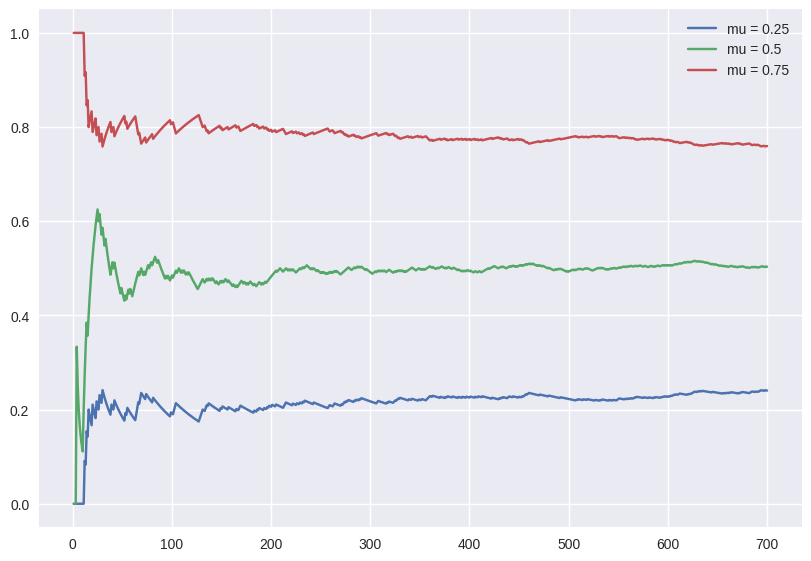

In [84]:
# Be(x|mu)のmuを変えて平均値の移動を観察してみる
# sample数
sample_num = 700
# muの種類
mus = [0.25,0.5,0.75]
# グラフのｘ軸用
x_axis = np.arange(1,sample_num + 1,1)
# 各muでサンプリング
for mu in tqdm(mus):
  binom = dist.Binomial(probs = mu)
  samples = binom.sample(rng_key, sample_shape = (sample_num,))
  means = jnp.array([])
  # 各sampleに対してそれより前までにとれたサンプルと合わせて平均値を算出
  # 平均値の変動をアレイに保存
  for i in range(len(samples)):
    if i == 0:
      means = jnp.append(means, samples[i])
    else:
      means = jnp.append(means, jnp.mean(samples[:i]))
  # 平均値変動を描画
  sns.lineplot(
      x = x_axis,
      y = means,
      label = f"mu = {mu}"
      )
plt.show()